In [1]:
%matplotlib inline

In [2]:
import pandas as pd

data = pd.read_excel('../bd/BANCO_FINAL.xlsx')

In [3]:
# TODO: Calculate number of students
n_students = data.shape[0]

# TODO: Calculate number of features
n_features = len(data.columns[:-2])

# TODO: Calculate passing students
n_curso = data[data.DESISTENTE == 'SIM'].shape[0]

# TODO: Calculate failing students
n_desistentes = data[data.DESISTENTE == 'NÃO'].shape[0]

# TODO: Calculate graduation rate
grad_rate = 1 - n_desistentes/n_students

# Print the results
print ("Número total de estudantes: {}".format(n_students))
print ("Número de características: {}".format(n_features))
print ("Número de estudantes em curso: {}".format(n_curso))
print ("Número de estudantes desistentes: {}".format(n_desistentes))
print ("Taxa de desistentes: {:.2f}%".format(grad_rate*100))

Número total de estudantes: 7156
Número de características: 26
Número de estudantes em curso: 2137
Número de estudantes desistentes: 5019
Taxa de desistentes: 29.86%


In [4]:
print(list(data.columns.values))

['INGRESSOCPF', 'CAMPUS', 'ANO', 'DESISTENTE', 'SITUAÇÃO', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'CR', 'renda sm', 'Pessoas que vivem com essa renda', 'renda per']


In [5]:
# Extract feature columns
feature_cols = ['CAMPUS', 'ANO', 'Q1', 'Q2', 'Q3', 
                'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9',
                'Q10', 'Q11', 'Q12', 'Q13', 'Q14',
                'Q15', 'Q16', 'Q17', 'Q18', 'Q19',
                'CR', 'renda sm',
                'Pessoas que vivem com essa renda', 'renda per']

# Extract target column 'passed'
target_col = ['DESISTENTE']

# Show the list of columns
print ("Feature columns:\n{}".format(feature_cols))
print ("\nTarget column: {}".format(target_col))

Feature columns:
['CAMPUS', 'ANO', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'CR', 'renda sm', 'Pessoas que vivem com essa renda', 'renda per']

Target column: ['DESISTENTE']


In [6]:
# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = data[feature_cols]
y_all = data[target_col]

In [7]:
if True:
    def preprocess_features(X):
        ''' Preprocesses the student data and converts non-numeric binary variables into
            binary (0/1) variables. Converts categorical variables into dummy variables. '''

        # Initialize new output DataFrame
        output = pd.DataFrame(index = X.index)

        # Investigate each feature column for the data
        for col, col_data in X.iteritems():

            # If data type is non-numeric, replace all yes/no values with 1/0
            if col_data.dtype == object:
                col_data = col_data.replace(['SIM', 'NÃO'], [1, 0])

            # If data type is categorical, convert to dummy variables
            if col_data.dtype == object:
                # Example: 'school' => 'school_GP' and 'school_MS'
                col_data = pd.get_dummies(col_data, prefix = col)  

            # Collect the revised columns
            output = output.join(col_data)

        return output

    X_all = preprocess_features(X_all)
    #y_all = preprocess_features(y_all)
print ("Processed feature columns ({} total features):\n".format(len(X_all.columns)))

Processed feature columns (75 total features):



In [8]:
X_norm = (X_all - X_all.mean()) / (X_all.max() - X_all.min())

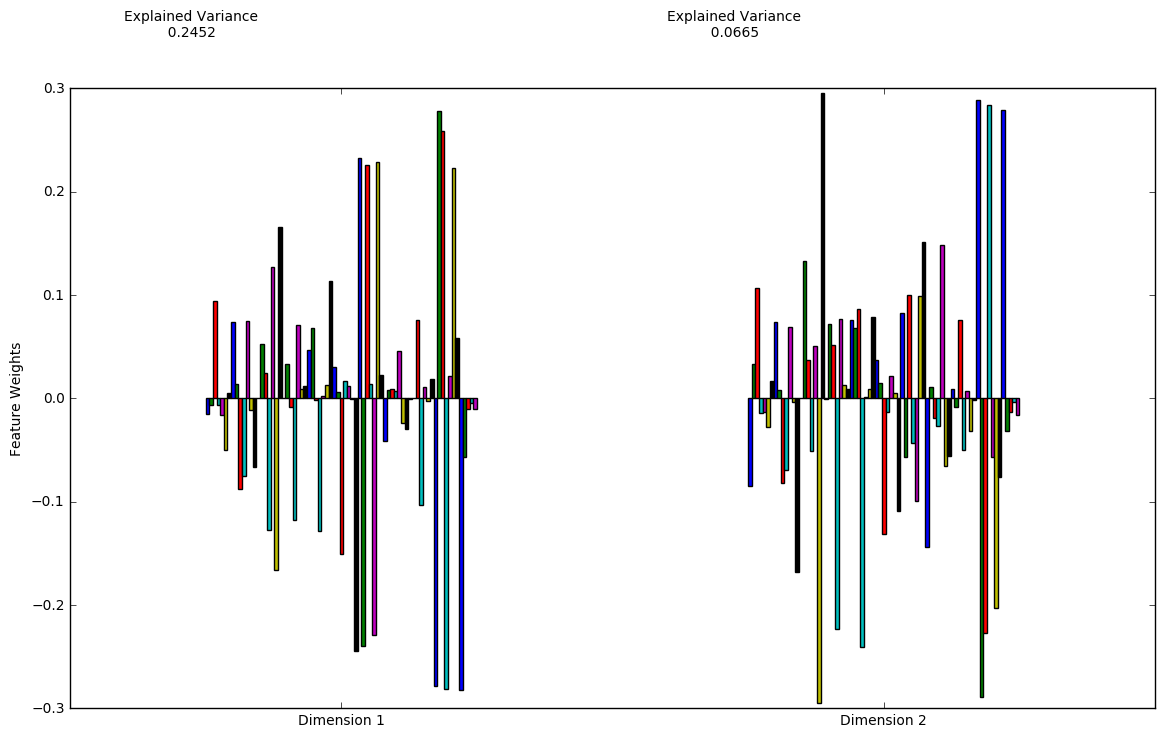

In [14]:
from sklearn.decomposition import PCA
pca = PCA(2, random_state=42).fit(X_norm)
reduced_data = pca.transform(X_norm)
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

# Generate PCA results plot
import render as rs
pca_results = rs.pca_results(X_norm, pca)

In [15]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.cluster import KMeans
from sklearn import mixture
from sklearn.metrics import silhouette_score

for n in range(2,10):
    clusterer = KMeans(n_clusters=n, random_state=42).fit(reduced_data)

# TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(reduced_data)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    print ("Silhouette Score for {0} clusters is {1:.4f}.".format(n, score))

Silhouette Score for 2 clusters is 0.5769.
Silhouette Score for 3 clusters is 0.5541.
Silhouette Score for 4 clusters is 0.5439.
Silhouette Score for 5 clusters is 0.5260.
Silhouette Score for 6 clusters is 0.5023.
Silhouette Score for 7 clusters is 0.4664.
Silhouette Score for 8 clusters is 0.4424.
Silhouette Score for 9 clusters is 0.4380.


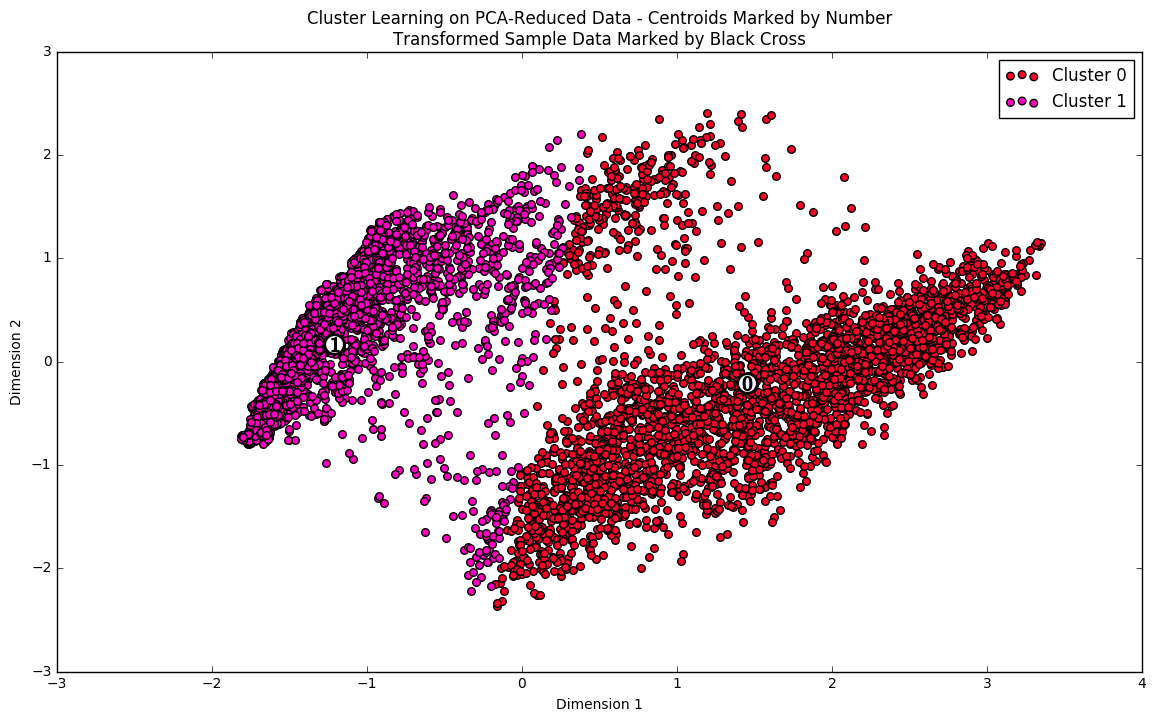

In [16]:
# Display the results of the clustering from implementation
clusterer = KMeans(n_clusters=2, random_state=5).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.cluster_centers_
sample_preds = clusterer.predict(reduced_data)

rs.cluster_results(reduced_data, preds, centers)